## 多クラスへの分類

- 目的変数が2クラスの分類
- 目的変数が2クラスより多い場合の分類

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Iris データセット
iris = sns.load_dataset('iris')

# - 0, 50, 100 行目を表示
iris.iloc[[0, 50, 100]]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


### 目的変数が2クラスの分類

In [2]:
# 2値データへの分類のため、species から setosa を除外
df = iris.query('species!="setosa"')

# speciesを 0, 1 にするためにダミー変数化
df = pd.get_dummies(data=df, drop_first=True)

# versicolor, virginica だけになっていることを確認
# - 0, 50 行目を表示
df.iloc[[0, 50]]

,sepal_length,sepal_width,petal_length,petal_width,species_virginica
50,7.0,3.2,4.7,1.4,0
100,6.3,3.3,6.0,2.5,1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# 説明変数、目的変数の設定
# - 説明変数の選択に特に意味は無い
X = df[['sepal_length', 'petal_length']]
Y = df.species_virginica

# 教師データとテストデータに分割
# - ホールドアウト法
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# ナイーブベイズ
model = GaussianNB()

# 教師データを学習
model.fit(X_train, Y_train)

# テストデータについてモデルからの予測値を計算
Y_predict = model.predict(X_test)

### 2クラス分類の結果

![accuracy](slides/6_27.png)

In [4]:
# species は versicolor, virginica の2種類
# - virginica が 1 = 陽性
species_dict = {
    'versicolor': 0,
    'virginica': 1
}

# 精度の表示
# - ランダムに教師データとテストデータを選択するホールドアウト法の結果は、実行ごとに変わることに注意
# classification_report()
# - Y_test: 正解
# - Y_predict: 予測値
print(classification_report(Y_test, Y_predict, target_names=species_dict, digits=3))

              precision    recall  f1-score   support

  versicolor      0.947     0.900     0.923        20
   virginica      0.818     0.900     0.857        10

    accuracy                          0.900        30
   macro avg      0.883     0.900     0.890        30
weighted avg      0.904     0.900     0.901        30



classification_report の結果

virginica
- virginica を陽性として算出した precision, recall, f1-score（調和平均）
  - 2つ下のセルの結果 precision, recall と値が同じ
- support
  - クラスのサンプル数

accuracy
- 陽性、陰性 (TP, TN) が逆になっても値は同じため、別の行に表示
- 2つ下のセルの結果 accuracy と値が同じ

macro avg（マクロ平均）
- 各クラスの精度の平均

weighted avg（support で重み付けをした平均）
- 各クラスの精度とそのサンプル数 (support) の積の合計をサンプル数の合計で割った値

In [5]:
# DataFrame に変換して表示
pd.DataFrame(classification_report(Y_test, Y_predict, target_names=species_dict,
                                   output_dict=True))

,versicolor,virginica,accuracy,macro avg,weighted avg
precision,0.947368,0.818182,0.9,0.882775,0.904306
recall,0.900000,0.900000,0.9,0.900000,0.900000
f1-score,0.923077,0.857143,0.9,0.890110,0.901099
support,20.000000,10.000000,0.9,30.000000,30.000000


In [6]:
# 正確度、適合度、再現率（感度）、特異度
# - virginica を陽性として算出
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('precision: {:.3f}, recall: {:.3f}'.format(
      precision_score(Y_test, Y_predict), recall_score(Y_test, Y_predict)))
print('accuracy: {:.3f}'.format(accuracy_score(Y_test, Y_predict)))

precision: 0.818, recall: 0.900
accuracy: 0.900


In [7]:
from sklearn.metrics import confusion_matrix

# 混同行列の表示
print(confusion_matrix(Y_test, Y_predict))

[[18  2]
 [ 1  9]]


混同行列
- 1行目1列：実際が0、予測が0 (真陰性：TN)
- 1行目2列：実際が0、予測が1 (偽陽性：FP)
- 2行目1列：実際が1、予測が0 (偽陰性：FN)
- 2行目2列：実際が1、予測が1 (真陽性：TP)

classification_report の support の値
- versicolor: 1行目の合計値
- virginica : 2行目の合計値

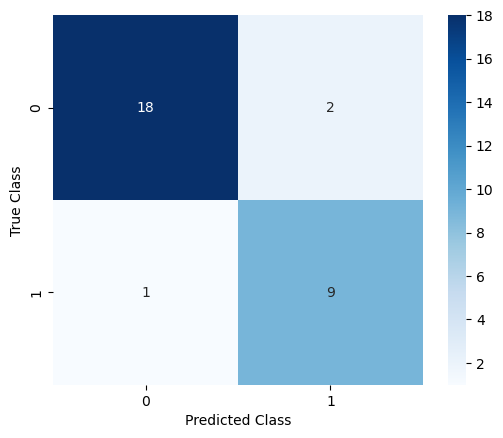

In [8]:
# 混同行列の可視化
sns.heatmap(confusion_matrix(Y_test, Y_predict),
            square=True, cbar=True, annot=True, cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

### 多クラスへの分類

In [9]:
# 目的変数 species を数値化
# - 0, 1, 2 の値をとるようにする

# species は setosa, versicolor, virginica の3種類
species_dict = {
    'setosa': 0,
    'versicolor': 1,
    'virginica': 2
}

# species を、文字列から数値へ変換
iris['species_int'] = iris['species'].map(lambda x: species_dict[x])

# 確認
# - 0, 50, 100 行目を表示
iris.iloc[[0, 50, 100]]

,sepal_length,sepal_width,petal_length,petal_width,species,species_int
0,5.1,3.5,1.4,0.2,setosa,0
50,7.0,3.2,4.7,1.4,versicolor,1
100,6.3,3.3,6.0,2.5,virginica,2


In [10]:
# 説明変数、目的変数の設定
# - 説明変数の選択に特に意味は無い
X = iris[['sepal_length', 'petal_length']]
Y = iris.species_int

# 教師データとテストデータに分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# ナイーブベイズ
model = GaussianNB()

# 教師データを学習
model.fit(X_train, Y_train)

# テストデータについてモデルからの予測値を計算
Y_predict = model.predict(X_test)

### 多クラス分類の結果

![accuracy](slides/7_11.png)

[[14  0  0]
 [ 0 16  3]
 [ 0  1 11]]


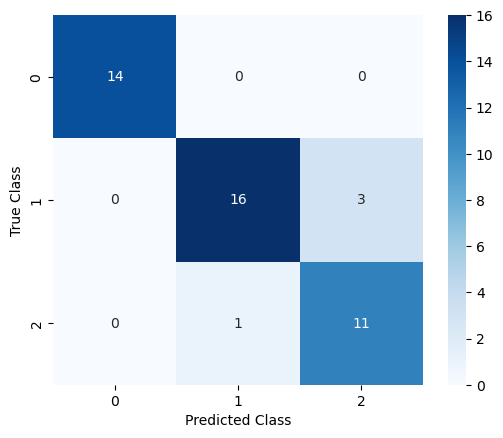

In [11]:
# 混同行列の可視化
print(confusion_matrix(Y_test, Y_predict))
sns.heatmap(confusion_matrix(Y_test, Y_predict),
            square=True, cbar=True, annot=True, cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

実際のクラス 1 (versicolor) について

適合度 (precision) …縦を見る
- TP (True Class 1, Predicted Class 1) / TP + FP (True Class 0 & 2, Predicted Class 1)

感度 (recall) …横を見る
- TP (True Class 1, Predicted Class 1) / TP + FN (True Class 1, Predicted Class 0 & 2)

f1-score（適合度と感度の調和平均）
- 2•precision•recall / (precision + recall)

In [12]:
# 結果の表示
print(classification_report(Y_test, Y_predict, target_names=species_dict, digits=3))

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        14
  versicolor      0.941     0.842     0.889        19
   virginica      0.786     0.917     0.846        12

    accuracy                          0.911        45
   macro avg      0.909     0.920     0.912        45
weighted avg      0.918     0.911     0.912        45



In [13]:
# DataFrame に変換して表示
pd.DataFrame(classification_report(Y_test, Y_predict, target_names=species_dict,
                                   output_dict=True))

,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,0.941176,0.785714,0.911111,0.908964,0.918021
recall,1.0,0.842105,0.916667,0.911111,0.919591,0.911111
f1-score,1.0,0.888889,0.846154,0.911111,0.911681,0.912061
support,14.0,19.000000,12.000000,0.911111,45.000000,45.000000
